
# Pre-Entrega Gabriela Vignolo

### Abstract

Este proyecto de Data Science se centra en el análisis de las variables de edad y género para predecir el abandono y éxito académico en estudiantes de educación superior, segun datos de un instituto de educación superior de Portugal. A través de un análisis exploratorio de datos (EDA) y la construcción de modelos predictivos, este estudio busca identificar cómo la edad y el género influyen en las tasas de graduación y abandono escolar.

Se busca refutar o comprobar las hipótesis mencionadas debajo, siendo que la edad al momento de la inscripción podría estar relacionada con la probabilidad de éxito académico, mientras que también se esperan diferencias significativas en las tasas de graduación entre géneros. Este enfoque permitirá a las instituciones educativas comprender mejor cómo estos factores afectan el rendimiento estudiantil, proporcionando datos para intervenciones que puedan mejorar la retención y el éxito académico.

### ﻿Hipótesis del Proyecto:

1: La edad al momento de la inscripción se encuentra relacionada con la probabilidad de graduación, siendo que los estudiantes más jóvenes tienen una mayor tasa de éxito académico.

2: El género tiene incidencia en la tasa de graduación.


### Importación de librerias

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Lectura del dataset y utilización del metodo head

In [197]:
df = pd.read_csv('Students_Dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.0,0,15.5,2.8,-4.06,Dropout
3,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.5,0,8.9,1.4,3.51,Dropout
4,1,1,2,16,1,1,1,13,27,5,...,0,6,0,0,0.0,0,12.7,3.7,-1.70,Dropout


In [199]:
# Codificar la columna 'Target' a valores numéricos
df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0})

In [201]:
df.shape

(4424, 35)

In [203]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

#### El dataset contiene 35 columnas y 4424 registros. Descripcion de las columnas:

    1- Marital status: The marital status of the student. (Categorical)
    2- Application mode: The method of application used by the student. (Categorical)
    3- Application order: The order in which the student applied. (Numerical)
    4- Course: The course taken by the student. (Categorical)
    5- Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
    6- Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
    7- Nacionality: The nationality of the student. (Categorical)
    8- Mother's qualification: The qualification of the student's mother. (Categorical)
    9- Father's qualification: The qualification of the student's father. (Categorical)
    10- Mother's occupation: The occupation of the student's mother. (Categorical)
    11- Father's occupation: The occupation of the student's father. (Categorical)
    12- Displaced: Whether the student is a displaced person. (Categorical)
    13- Educational special needs: Whether the student has any special educational needs. (Categorical)
    14- Debtor: Whether the student is a debtor. (Categorical)
    15- Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
    16- Gender: The gender of the student. (Categorical)
    17- Scholarship holder: Whether the student is a scholarship holder. (Categorical)
    18- Age at enrollment: The age of the student at the time of enrollment. (Numerical)
    19- International: Whether the student is an international student. (Categorical)
    20- Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
    21- Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
    22- Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
    23- Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)
    24- Curricular units 1st sem (grade): Curricular Units 1st Sem (grade)
    25- Curricular units 1st sem (without evaluation): Curricular Units 1st Sem (without evaluation)
    26- Curricular units 2nd sem (credited): The number of curricular units credited by the student in the second semester. (Numerical)
    27- Curricular units 2nd sem (enrolled): The number of curricular units enrolled by the student in the second semester. (Numerical)
    28- Curricular units 2nd sem (evaluations): The number of curricular units evaluated by the student in the second semester. (Numerical)
    29- Curricular units 2nd sem (approved): The number of curricular units approved by the student in the second semester. (Numerical)
    30- Curricular units 2nd sem (grade): Curricular Units second Sem (grade)
    31- Curricular units 2nd sem (without evaluation): Curricular Units second Sem (without evaluation)
    32- Unemployment Rate
    33- Inflation rate
    34- GDP Rate
    35- Target

### Eliminación de columnas que no seran utilizadas

Dado que nuestro objetivo es analizar la incidencia como la edad y el genero en el Target, se removeran columnas que consideramos innecesarias para este analisis como son las siguientes. Decido dejar otras variables socioeconomicas para ver la incidencia de las mismas en el Dropout y Graduate.
* Application mode
* Application order
* Previous qualification
* Curricular units 1st sem (credited)
* Curricular units 1st sem (enrolled)
* Curricular units 1st sem (evaluations)
* Curricular units 1st sem (approved)
* Curricular units 1st sem (grade)
* Curricular units 1st sem (without evaluations)
* Curricular units 2nd sem (credited)
* Curricular units 2nd sem (enrolled)
* Curricular units 2nd sem (evaluations)
* Curricular units 2nd sem (approved)
* Curricular units 2nd sem (grade)
* Curricular units 2nd sem (without evaluations)
* Educational special needs
* Debtor
* Tuition fees up to date
* International
* Scholarship holder
* Unemployment rate
* Inflation rate
* GDP
* Displaced

In [207]:
columnas_a_eliminar = ['Application mode', 'Application order','Previous qualification','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Educational special needs','Debtor','Tuition fees up to date','International','Scholarship holder','Unemployment rate','Inflation rate','GDP','Displaced']
df = df.drop(columns=columnas_a_eliminar)

### Utilizacion del metodo head y describe del dataframe limpio

In [210]:
df.head()

,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Age at enrollment,Target
0,1,2,1,1,13,10,6,10,1,20,0
1,1,5,1,1,22,27,10,10,1,19,0
2,1,11,1,1,22,27,10,10,1,22,0
3,1,10,1,1,1,14,5,8,0,18,0
4,1,16,1,1,13,27,5,10,0,19,0


In [212]:
df.describe().round(2) #Metodo round para rendondar a 2 decimales

,Marital status,Course,Daytime/evening attendance,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Gender,Age at enrollment,Target
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,9.90,0.89,1.25,12.32,16.46,7.32,7.82,0.35,23.27,0.68
std,0.61,4.33,0.31,1.75,9.03,11.04,4.00,4.86,0.48,7.59,0.47
min,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,17.00,0.00
25%,1.00,6.00,1.00,1.00,2.00,3.00,5.00,5.00,0.00,19.00,0.00
50%,1.00,10.00,1.00,1.00,13.00,14.00,6.00,8.00,0.00,20.00,1.00
75%,1.00,13.00,1.00,1.00,22.00,27.00,10.00,10.00,1.00,25.00,1.00
max,6.00,17.00,1.00,21.00,29.00,34.00,32.00,46.00,1.00,70.00,1.00


## Gráficos

### Comparación de distribucion de las variables segun Target:

Veremos por medio de estos graficos qué variables tienen influencia en el éxito académico y lograr asi interpretar cómo diferentes factores afectan la probabilidad de graduación o abandono.

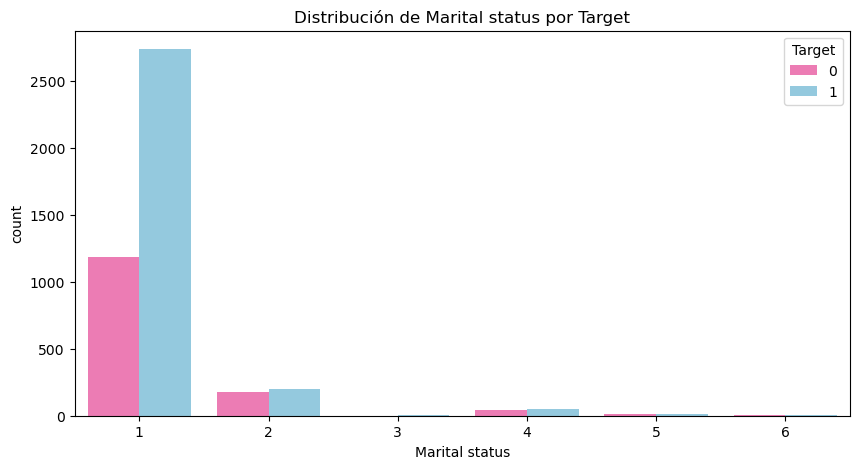

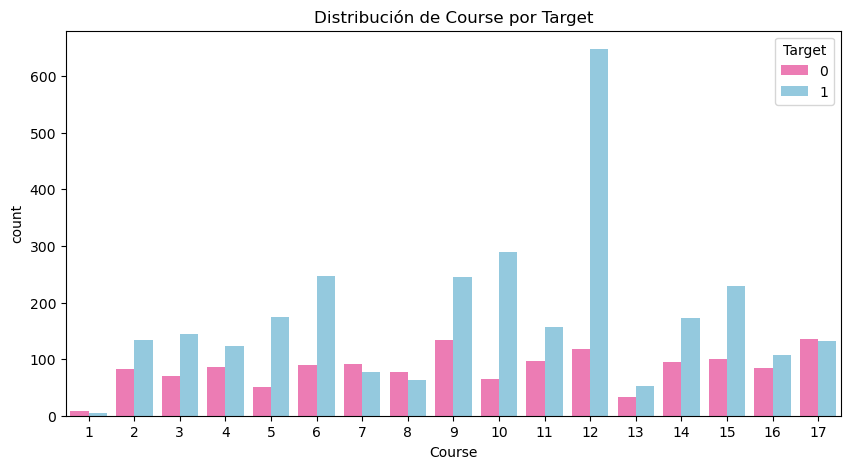

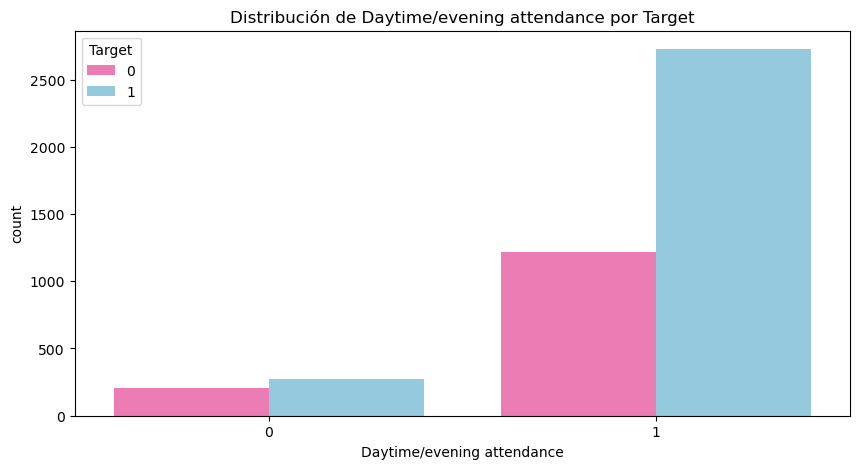

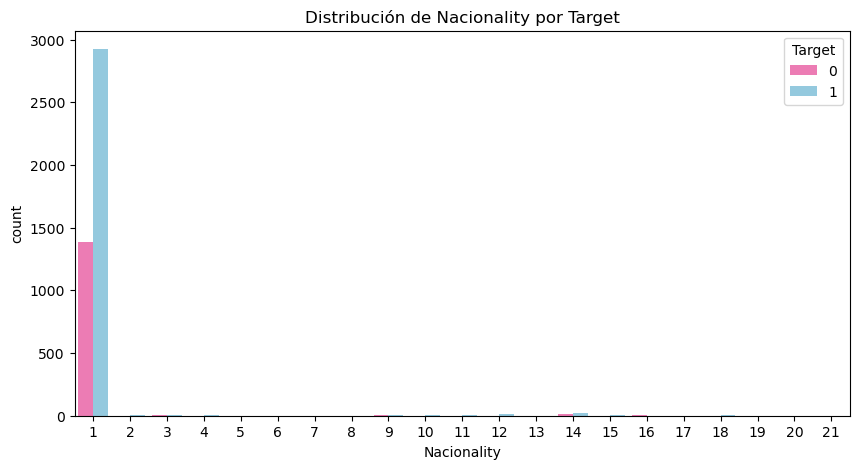

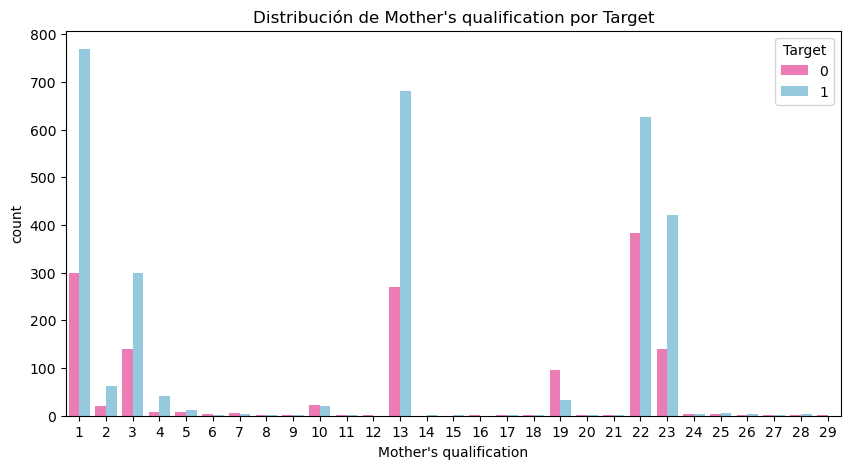

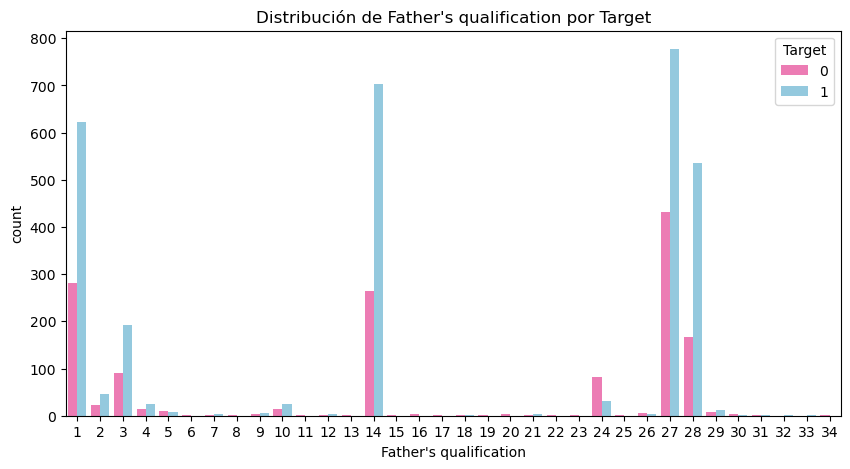

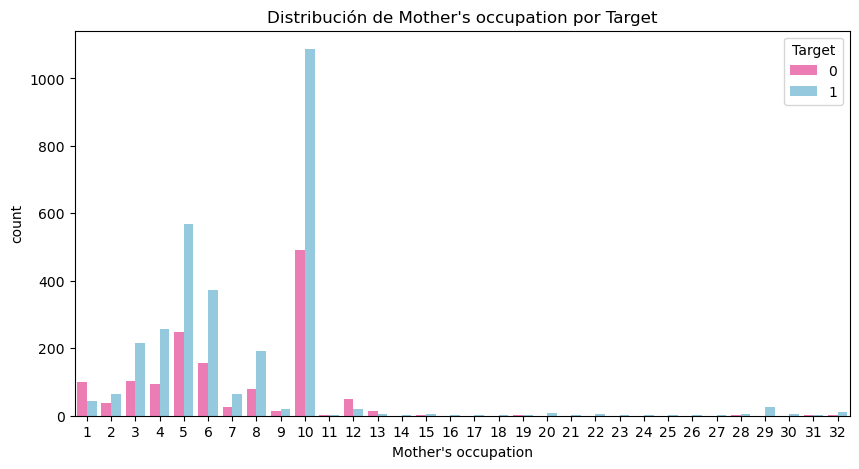

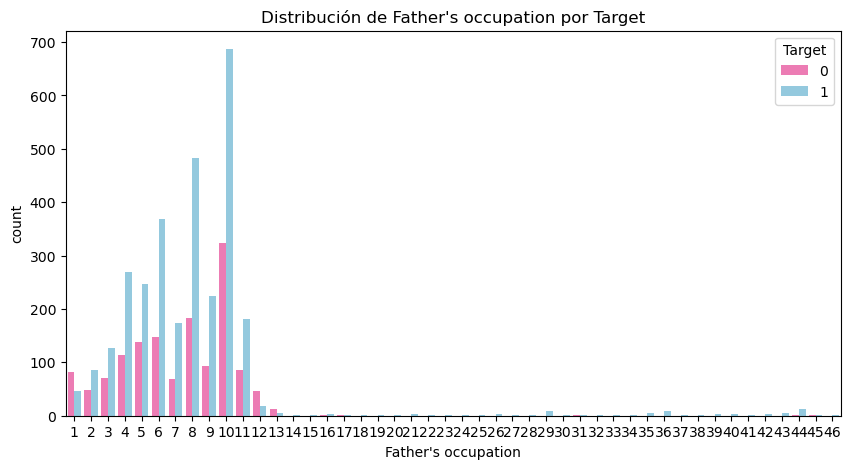

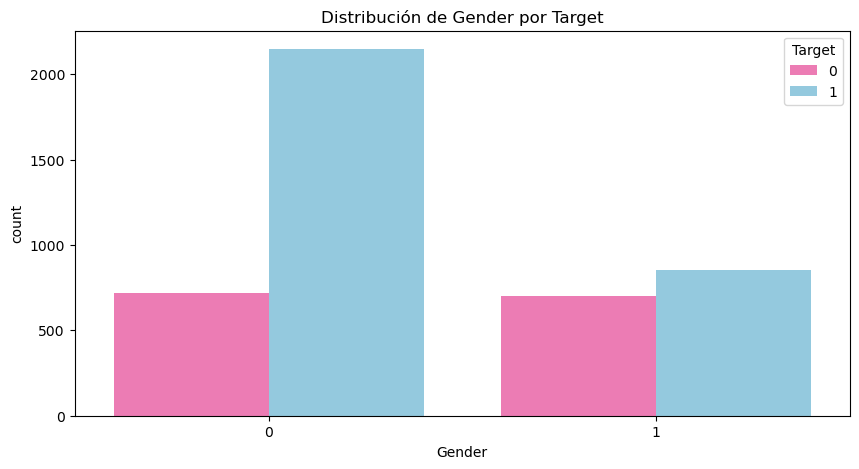

In [216]:
categorical_columns = [
    "Marital status", "Course", "Daytime/evening attendance",
    "Nacionality", "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", "Gender"
]

# Graficar la distribución de variables categóricas por Target
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="Target", palette={0: '#FF69B4', 1: '#87CEEB'})
    plt.title(f"Distribución de {col} por Target")
    plt.show()

In [217]:
print(df['Target'].unique())  # Verifica los valores únicos en 'Target'
print(df['Target'].isna().sum())  # Verifica si hay valores NaN en 'Target'

[0 1]
0


### Gráfico de distribucion por genero

Centrare mi analisis en estas dos, realizando graficos variados para poder estudiar dichas variables mas en profundidad.

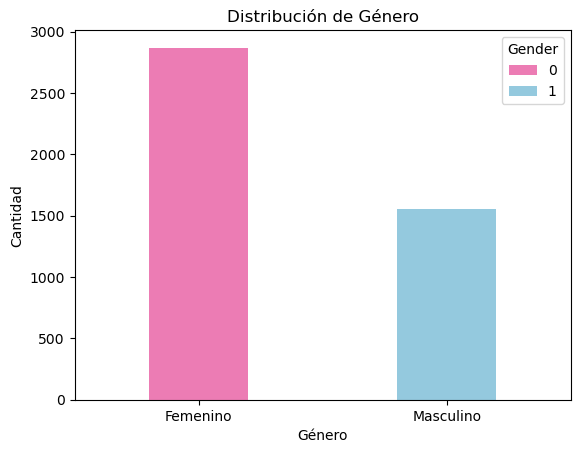

In [222]:
# Realizacion de countplot
sns.countplot(x='Gender', data=df,  hue='Gender', width=0.4, palette={0: '#FF69B4', 1: '#87CEEB'})
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino']) 
plt.show()

### Grafico de distribución de edades por género

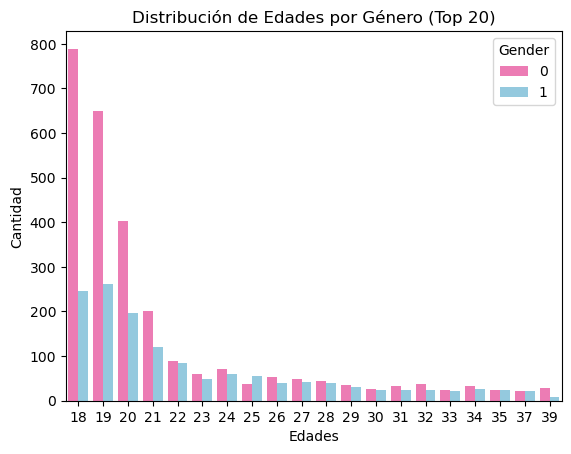

In [225]:
# Contar las ocurrencias de cada edad
age_counts = df['Age at enrollment'].value_counts()

# Seleccionar las 20 edades más comunes
top_20_ages = age_counts.head(20)

# Crear una lista con las 20 edades más comunes
top_20_ages_list = top_20_ages.index

# Filtrar el DataFrame para incluir solo las filas con esas 20 edades
filtered_students = df[df['Age at enrollment'].isin(top_20_ages_list)]

# Graficar
sns.countplot(x='Age at enrollment', data=filtered_students, hue='Gender', palette={0: '#FF69B4', 1: '#87CEEB'})

plt.title('Distribución de Edades por Género (Top 20)')
plt.xlabel('Edades')
plt.ylabel('Cantidad')
plt.show()

### Histograma de distribución de edades por género

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


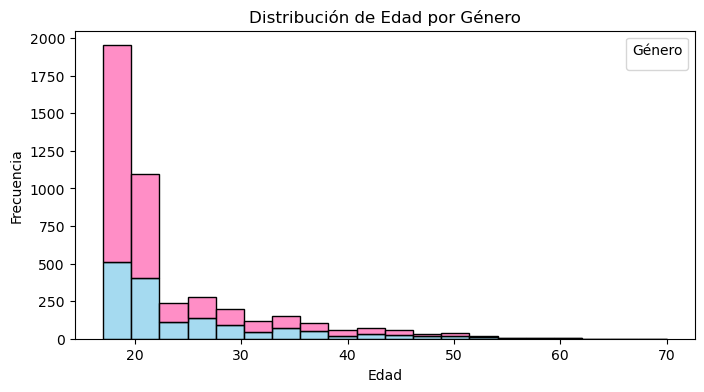

In [230]:
# Crear el histograma con diferentes colores para cada género
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age at enrollment', hue='Gender', multiple='stack', bins=20, palette={0: '#FF69B4', 1: '#87CEEB'})

# Configurar el título y las etiquetas
plt.title('Distribución de Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Género')

# Mostrar el gráfico
plt.show()

#### Conclusiones Histograma y Gráficos de Barras:

* En todos los graficos se ve claramente que las edades predominantes al momento de inscripcion son entre los 18 y 21 años, predominando la gran cantidad de mujeres por sobre los hombres.

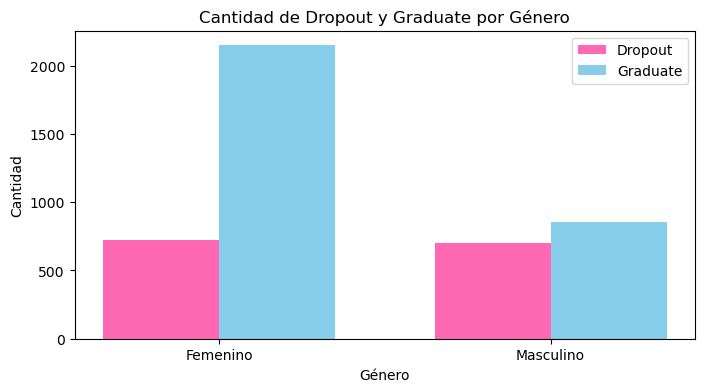

In [233]:
# Crear un dataframe con el conteo de Dropout y Graduate por género
gender_target_count = df.groupby(['Gender', 'Target']).size().unstack().reset_index()
gender_target_count.columns = ['Gender', 'Dropout', 'Graduate']

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.35
index = range(len(gender_target_count))

# Crear las barras para Dropout y Graduate
bar1 = ax.bar(index, gender_target_count['Dropout'], bar_width, label='Dropout', color='#FF69B4')
bar2 = ax.bar([i + bar_width for i in index], gender_target_count['Graduate'], bar_width, label='Graduate', color='#87CEEB')

# Etiquetas y título
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Dropout y Graduate por Género')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['Femenino', 'Masculino'])
ax.legend()

# Mostrar el gráfico
plt.show()

In [235]:
# Cantidad de Dropout y Graduate por Genero:
# Agrupar por 'Gender' y 'Target' y contar el número de ocurrencias
gender_target_count = df.groupby(['Gender', 'Target']).size().reset_index(name='Cantidad')

# Mostrar el resultado
print(gender_target_count)

#Femenino = 0 / Masculino = 1
#Dropout = 0 / Graduate = 1

   Gender  Target  Cantidad
0       0       0       720
1       0       1      2148
2       1       0       701
3       1       1       855


#### Conclusiones
* Del total de la muestra, se ve que el exito academico (graduate) se da mayoritariamente en el genero femenino, la cantidad de droput es similar en ambos generos.

### Grafico de Edad promedio de inscripción por genero:

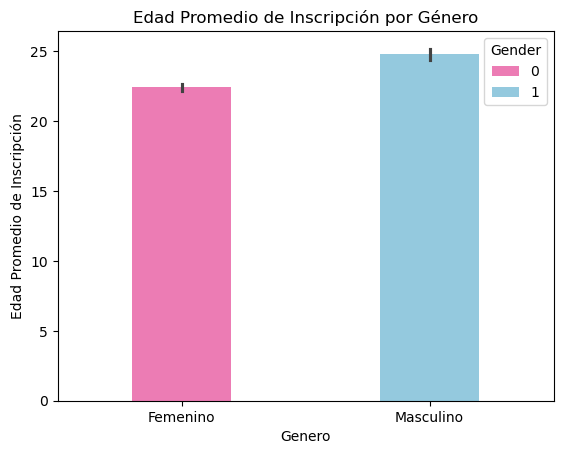

In [239]:
sns.barplot(x='Gender', y='Age at enrollment', data=df, hue='Gender', width=0.4, palette={0: '#FF69B4', 1: '#87CEEB'})
plt.title('Edad Promedio de Inscripción por Género')
plt.xlabel('Genero')
plt.ylabel('Edad Promedio de Inscripción')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

#### Conclusión del gráfico de barras
* Se ve claramente que la edad promedio de inscripcion es mayor en los hombres que en las mujeres.

### Boxplot
Realización de Boxplot para analisis de outliers.

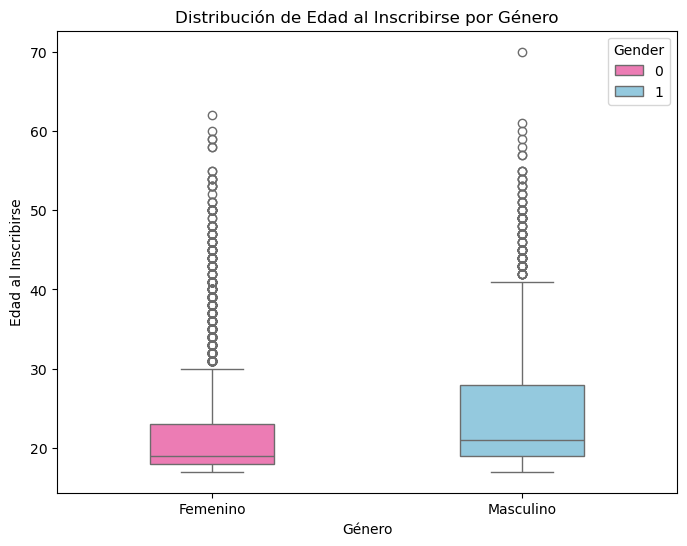

In [243]:
# Realizacion del grafico: 'Age at enrollment' según 'Gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age at enrollment', data=df, hue='Gender', width=0.4, palette={0: '#FF69B4', 1: '#87CEEB'})
plt.title('Distribución de Edad al Inscribirse por Género')
plt.xlabel('Género')
plt.ylabel('Edad al Inscribirse')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

#### Información de interes sobre el Boxplot:
#### Componentes:
- Cajas (Box): Representan el rango intercuartílico (IQR), que abarca el 50% central de los datos. La caja se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). La línea dentro de la caja es la mediana, que muestra el valor central de los datos.
- Bigotes (Whiskers): Extienden desde los cuartiles hasta el valor mínimo y máximo dentro de 1.5 veces el IQR desde los cuartiles. Los puntos fuera de estos límites se consideran valores atípicos.
- Puntos Atípicos: Representan valores que están fuera de los límites establecidos por los bigotes. Estos valores se encuentran significativamente alejados del rango central de los datos.
aja es asimetrica, lo que  puede indicar una tendencia en la edad al inscribirs, que se puede decir que es mayor a la mediana..
#### Análisis y Conclusiones del gráfico:

* La mediana para el genero masculino es mas alta que para el fenemino, lo que indica que en promedio, los hombres se inscriben a una edad mayor que las mujeres. Segun se calculo debajo, la Mediana de Edad al Inscribirse (Femenino): 19.0 y la Mediana de Edad al Inscribirse (Masculino): 21.0.
* Mayor dispersión en genero Masculino: La caja del género masculino es más amplia, lo que podría indicar que en promedio, las personas de ese género se inscriben a una edad más avanzada o tienen una mayor variacion en la edad de inscripción.
* Valores Atípicos: Hay mayor cantidad de valores atípicos del genero femenino, lo que podría ser indicativo de factores adicionales que afectan a la edad de inscripción. Debajo se estudian estos valorers (outliers).
* El bigote superior largo en el genero masculino, sugiere que hay una mayor dispersión de edades que están por encima del tercer cuartil (Q3). Esto significa que algunos individuos masculinos se inscriben a edades significativamente mayores que el promedio del grupo.

.

### Cálculo de mediana de edad por genero:

In [247]:
# df = pd.read_csv('ruta/a/tu/archivo.csv')  # Si es necesario cargar el DataFrame

# Calcular la mediana de 'Age at enrollment' para cada género
mediana_edad_femenino = df[df['Gender'] == 0]['Age at enrollment'].median()
mediana_edad_masculino = df[df['Gender'] == 1]['Age at enrollment'].median()

print(f"Mediana de Edad al Inscribirse (Femenino): {mediana_edad_femenino}")
print(f"Mediana de Edad al Inscribirse (Masculino): {mediana_edad_masculino}")

Mediana de Edad al Inscribirse (Femenino): 19.0
Mediana de Edad al Inscribirse (Masculino): 21.0


### Cálculo outliers

In [250]:
def calcular_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limites_inferiores = Q1 - 1.5 * IQR
    limites_superiores = Q3 + 1.5 * IQR
    return data[(data < limites_inferiores) | (data > limites_superiores)]

# Calcular outliers para cada género
outliers_femenino = calcular_outliers(df[df['Gender'] == 0]['Age at enrollment'])
outliers_masculino = calcular_outliers(df[df['Gender'] == 1]['Age at enrollment'])

print("Valores atípicos para mujeres:")
print(outliers_femenino)
print("\nValores atípicos para hombres:")
print(outliers_masculino)

Valores atípicos para mujeres:
8       55
14      39
27      39
30      36
52      33
        ..
4295    34
4346    37
4347    41
4376    32
4402    32
Name: Age at enrollment, Length: 356, dtype: int64

Valores atípicos para hombres:
7       43
178     50
182     70
183     48
187     49
        ..
3486    45
3574    57
3575    45
3577    43
4079    42
Name: Age at enrollment, Length: 101, dtype: int64


#### Informacion adicional sobre Target

In [253]:
# Contar la cantidad de cada categoría en la columna 'Target'
conteo_target = df['Target'].value_counts()

# Mostrar los resultados
print(conteo_target)

Target
1    3003
0    1421
Name: count, dtype: int64


### Gráfico de Violin
Se realiza para visualizar de una forma diferente la dispersion de las edades por género.

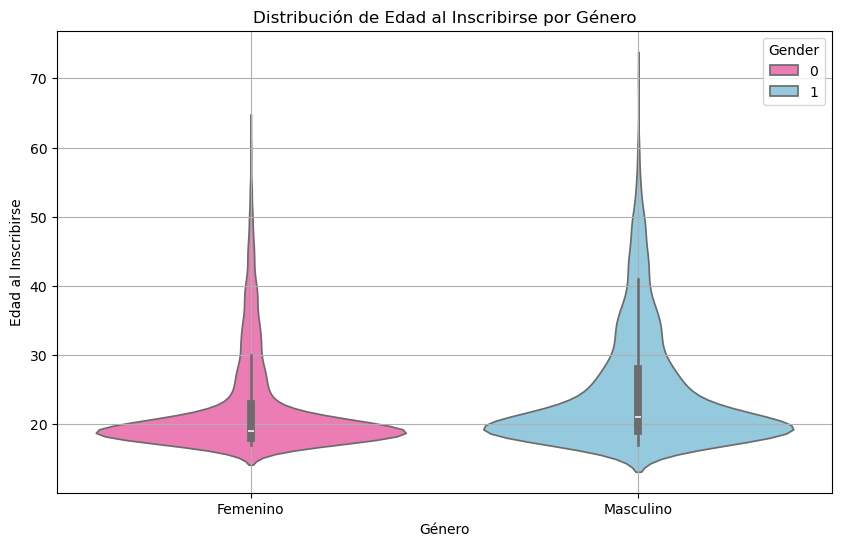

In [256]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age at enrollment', hue='Gender', data=df, palette={0: '#FF69B4', 1: '#87CEEB'})
plt.title('Distribución de Edad al Inscribirse por Género')
plt.xlabel('Género')
plt.ylabel('Edad al Inscribirse')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.grid(True)
plt.show()

### Gráfico de dispersion por edad y tasa de graduacion:

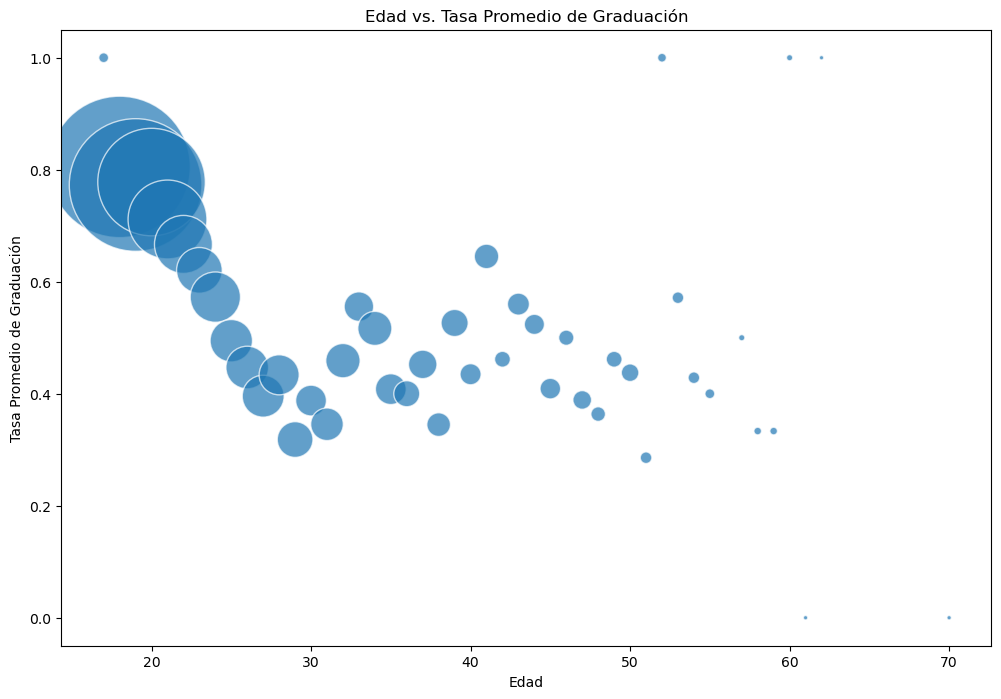

In [259]:
# Calculamos la media de Target por edad
age_target_mean = df.groupby('Age at enrollment')['Target'].mean().reset_index()
age_target_mean.columns = ['Edad', 'Tasa de Graduación']

# Calculamos la cantidad de personas por edad
age_counts = df['Age at enrollment'].value_counts().sort_index().reset_index()
age_counts.columns = ['Edad', 'Conteo de Personas']

# Fusionamos las dos tablas para tener la tasa de graduación y el conteo de personas en un solo DataFrame
age_data = pd.merge(age_target_mean, age_counts, on='Edad')

# Creamos el gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(
    age_data['Edad'], 
    age_data['Tasa de Graduación'], 
    s=age_data['Conteo de Personas'] * 10,  # Ajusta el tamaño de los puntos multiplicando por un factor
    alpha=0.7, 
    edgecolors='w'
)
plt.title('Edad vs. Tasa Promedio de Graduación')
plt.xlabel('Edad')
plt.ylabel('Tasa Promedio de Graduación')
plt.show()


#### Conclusiones del gráfico de dispersión

- Se puede decir que a menos edad, mayor es la probabilidad de graduarse (ya que Graduate=1 y Dropout=0) y por debajo de los 20 años la cantidad de personas cercanas a graduarse es notoriamente mayor (puntos de tamaño mas grade).
- Entre los 20 y los 30 años se ve una caida de la tasa de graduación, esto puede indicar que los estudiantes en estos años enfrentan mayores desafíos para graduarse o podrían haber cambios en sus prioridades o situaciones personales que afectan su capacidad para completar los estudios.
- Luego de los 30 años, el grafico se empieza a dispersar.
- Luego de los 40, la cantidad de estudiantes baja notablemente, lo cual refleja que los estudiantes en estos rangos de edad son menos comunes o están menos representados en el sistema educativo.

## Modelado

In [263]:
# Importacion de librerias:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1- Regresion Logistica

Precisión del modelo (Accuracy): 0.70
Precisión por clase: Dropout (0): 0.66, Graduate (1): 0.71
Sensibilidad (Recall) por clase: Dropout (0): 0.24, Graduate (1): 0.94
F1-Score por clase: Dropout (0): 0.35, Graduate (1): 0.81

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.66,0.24,0.35,446.0
1,0.71,0.94,0.81,882.0
accuracy,0.70,0.70,0.70,0.7
macro avg,0.68,0.59,0.58,1328.0
weighted avg,0.69,0.70,0.65,1328.0


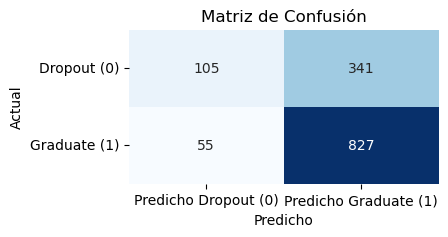

In [268]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('Target', axis=1)  # Elimina la columna 'Target' para usar el resto como características
y = df['Target']  # Esta es la variable que intentas predecir

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
logreg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = logreg_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)  # Precisión por clase
recall = recall_score(y_test, y_pred, average=None)  # Recall por clase
f1 = f1_score(y_test, y_pred, average=None)  # F1-Score por clase

# Mostrar los resultados por clase
print(f"Precisión del modelo (Accuracy): {accuracy:.2f}")
print(f"Precisión por clase: Dropout (0): {precision_per_class[0]:.2f}, Graduate (1): {precision_per_class[1]:.2f}")
print(f"Sensibilidad (Recall) por clase: Dropout (0): {recall[0]:.2f}, Graduate (1): {recall[1]:.2f}")
print(f"F1-Score por clase: Dropout (0): {f1[0]:.2f}, Graduate (1): {f1[1]:.2f}")

# Reporte de clasificación en formato de tabla con pandas, redondeado a 2 decimales
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Redondear los valores a 2 decimales
report_df = report_df.round(2)

# Mostrar el DataFrame del reporte de clasificación
print("\nReporte de Clasificación:")
display(report_df)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Convertir la matriz en un DataFrame para mejor presentación
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Dropout (0)', 'Graduate (1)'], 
                              columns=['Predicho Dropout (0)', 'Predicho Graduate (1)'])

# Crear el heatmap para la matriz de confusión con tamaño 6x4
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

### Modelo de Regresion Logistica, quitando variables de a una para ver su impacto:

In [271]:
# Lista de todas las variables (sin 'Target')
variables = [
    'Marital status', 'Course', 'Daytime/evening attendance', 
    'Nacionality', "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation", 'Gender', 'Age at enrollment'
]

# Almacenar resultados
results = {}

for variable in variables:
    # Dividir los datos en características (X) y la variable objetivo (y)
    X = df.drop('Target', axis=1).drop(variable, axis=1)  # Eliminar la variable actual
    y = df['Target']

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de Regresión Logística
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = logreg_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision_per_class = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Almacenar los resultados
    results[variable] = {
        'Accuracy': accuracy,
        'Precision (Dropout)': precision_per_class[0],
        'Precision (Graduate)': precision_per_class[1],
        'Recall (Dropout)': recall[0],
        'Recall (Graduate)': recall[1],
        'F1-Score (Dropout)': f1[0],
        'F1-Score (Graduate)': f1[1]
    }

# Convertir resultados en DataFrame para mejor presentación
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)

# Mostrar los resultados
print("\nImpacto de eliminar variables con Regresión Logística:")
display(results_df)


Impacto de eliminar variables con Regresión Logística:


,Accuracy,Precision (Dropout),Precision (Graduate),Recall (Dropout),Recall (Graduate),F1-Score (Dropout),F1-Score (Graduate)
Marital status,0.70,0.64,0.70,0.22,0.94,0.33,0.80
Course,0.70,0.65,0.71,0.24,0.94,0.35,0.81
Daytime/evening attendance,0.69,0.63,0.70,0.21,0.94,0.32,0.80
Nacionality,0.70,0.66,0.71,0.24,0.94,0.35,0.81
Mother's qualification,0.70,0.65,0.71,0.23,0.94,0.34,0.81
Father's qualification,0.70,0.66,0.71,0.24,0.94,0.35,0.81
Mother's occupation,0.70,0.64,0.70,0.22,0.94,0.33,0.80
Father's occupation,0.70,0.66,0.71,0.23,0.94,0.34,0.81
Gender,0.69,0.63,0.70,0.19,0.94,0.29,0.80
Age at enrollment,0.67,0.57,0.68,0.11,0.96,0.18,0.80


### Conclusión general del Modelo de Regresion Logistica: 

El modelo tiene una precisión del 70%, lo que quiere decir que el 70% de las predicciones del modelo fueron correctas. 
El desempeño es mucho mejor en la predicción de la clase Graduate (1) que en la clase Dropout (0). Esto se refleja en el bajo recall de la clase Dropout, lo que indica que el modelo tiene problemas para detectar correctamente a los estudiantes que abandonan. 

La eliminación de las variables Age at enrollment, Gender y Daytime/evening attendance, hacen que el modelo tenga un impacto negativo tanto en la precisión general como en el recall para Dropout y para el F1 Score, sugiriendo que pueden ser variables importantes para predecir el abandono.


## 2- Random Forest

Precisión del modelo (Accuracy): 0.70
Precisión por clase: Dropout (0): 0.58, Graduate (1): 0.74
Sensibilidad (Recall) por clase: Dropout (0): 0.40, Graduate (1): 0.85
F1-Score por clase: Dropout (0): 0.47, Graduate (1): 0.79

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.58,0.40,0.47,446.0
1,0.74,0.85,0.79,882.0
accuracy,0.70,0.70,0.70,0.7
macro avg,0.66,0.63,0.63,1328.0
weighted avg,0.68,0.70,0.68,1328.0


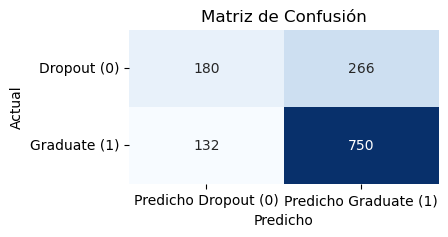

In [278]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('Target', axis=1)  # Elimina la columna 'Target' para usar el resto como características
y = df['Target']  # Esta es la variable que intentas predecir

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)  # Precisión por clase
recall = recall_score(y_test, y_pred, average=None)  # Recall por clase
f1 = f1_score(y_test, y_pred, average=None)  # F1-Score por clase

# Mostrar los resultados por clase
print(f"Precisión del modelo (Accuracy): {accuracy:.2f}")
print(f"Precisión por clase: Dropout (0): {precision_per_class[0]:.2f}, Graduate (1): {precision_per_class[1]:.2f}")
print(f"Sensibilidad (Recall) por clase: Dropout (0): {recall[0]:.2f}, Graduate (1): {recall[1]:.2f}")
print(f"F1-Score por clase: Dropout (0): {f1[0]:.2f}, Graduate (1): {f1[1]:.2f}")

# Reporte de clasificación en formato de tabla con pandas, redondeado a 2 decimales
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Redondear los valores a 2 decimales
report_df = report_df.round(2)

# Mostrar el DataFrame del reporte de clasificación
print("\nReporte de Clasificación:")
display(report_df)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Convertir la matriz en un DataFrame para mejor presentación
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Dropout (0)', 'Graduate (1)'], 
                              columns=['Predicho Dropout (0)', 'Predicho Graduate (1)'])

# Crear el heatmap para la matriz de confusión con tamaño 6x4
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

### Modelo de Random Forest, quitando variables de a una para ver su impacto:

In [281]:
# Lista de todas las variables (sin 'Target')
variables = [
    'Marital status', 'Course', 'Daytime/evening attendance', 
    'Nacionality', "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation", 'Gender', 'Age at enrollment'
]

# Almacenar resultados
results = {}

for variable in variables:
    # Dividir los datos en características (X) y la variable objetivo (y)
    X = df.drop('Target', axis=1).drop(variable, axis=1)  # Eliminar la variable actual
    y = df['Target']

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = rf_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision_per_class = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Almacenar los resultados
    results[variable] = {
        'Accuracy': accuracy,
        'Precision (Dropout)': precision_per_class[0],
        'Precision (Graduate)': precision_per_class[1],
        'Recall (Dropout)': recall[0],
        'Recall (Graduate)': recall[1],
        'F1-Score (Dropout)': f1[0],
        'F1-Score (Graduate)': f1[1]
    }

# Convertir resultados en DataFrame para mejor presentación
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)

# Mostrar los resultados
print("\nImpacto de eliminar variables:")
display(results_df)


Impacto de eliminar variables:


,Accuracy,Precision (Dropout),Precision (Graduate),Recall (Dropout),Recall (Graduate),F1-Score (Dropout),F1-Score (Graduate)
Marital status,0.70,0.58,0.74,0.42,0.85,0.49,0.79
Course,0.67,0.52,0.72,0.38,0.82,0.44,0.77
Daytime/evening attendance,0.69,0.55,0.73,0.39,0.84,0.46,0.78
Nacionality,0.69,0.56,0.73,0.40,0.84,0.47,0.79
Mother's qualification,0.69,0.55,0.73,0.41,0.83,0.47,0.78
Father's qualification,0.69,0.56,0.73,0.40,0.84,0.47,0.78
Mother's occupation,0.69,0.55,0.74,0.41,0.83,0.47,0.78
Father's occupation,0.69,0.55,0.74,0.41,0.83,0.47,0.78
Gender,0.70,0.57,0.73,0.38,0.85,0.45,0.79
Age at enrollment,0.68,0.53,0.72,0.36,0.84,0.43,0.78


### Conclusión general del Modelo de Regresion Logistica:

El modelo tiene una precisión del 70%, lo que quiere decir que el 70% de las predicciones del modelo fueron correctas.
Aunque el modelo tiene un rendimiento aceptable en términos generales, presenta limitaciones en la predicción de estudiantes que abandonan, esto lo vemos en los porcentajes de desempeño (58%), recall (40%) y F1-Score (47%), lo que podría tener implicaciones significativas si se utiliza para tomar decisiones. Para la prediccion de los estudiantes que se graduaron, el rendimiento es mejor, presentando un desempeño del 74%, recall de 85% y un F1-Score del 79%.
Mas alla de los resultados en concreto, podemos decir que se ve una mejora en los resultados comparados con el modelo de Regresion Logistica.

La eliminación de las variables Age at enrollment y Course en este caso, hacen que el modelo tenga un impacto negativo tanto en la precisión general como en el recall para Dropout y para el F1 Score, sugiriendo que pueden ser variables importantes para predecir el abandono.
No pareciera en este caso que Gender tenga una incidencia en la prediccion del abandono.

## 3- XGBoost

Precisión del modelo (Accuracy): 0.71
Precisión por clase: Dropout (0): 0.58, Graduate (1): 0.75
Sensibilidad (Recall) por clase: Dropout (0): 0.44, Graduate (1): 0.84
F1-Score por clase: Dropout (0): 0.50, Graduate (1): 0.79

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.58,0.44,0.50,446.00
1,0.75,0.84,0.79,882.00
accuracy,0.71,0.71,0.71,0.71
macro avg,0.67,0.64,0.65,1328.00
weighted avg,0.69,0.71,0.69,1328.00


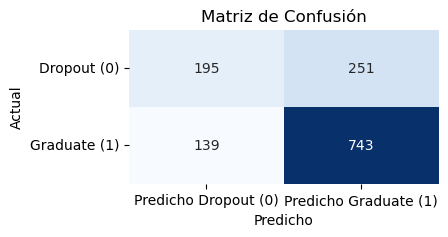

In [285]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('Target', axis=1)  # Elimina la columna 'Target' para usar el resto como características
y = df['Target']  # Esta es la variable que intentas predecir

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)  # Precisión por clase
recall = recall_score(y_test, y_pred, average=None)  # Recall por clase
f1 = f1_score(y_test, y_pred, average=None)  # F1-Score por clase

# Mostrar los resultados por clase
print(f"Precisión del modelo (Accuracy): {accuracy:.2f}")
print(f"Precisión por clase: Dropout (0): {precision_per_class[0]:.2f}, Graduate (1): {precision_per_class[1]:.2f}")
print(f"Sensibilidad (Recall) por clase: Dropout (0): {recall[0]:.2f}, Graduate (1): {recall[1]:.2f}")
print(f"F1-Score por clase: Dropout (0): {f1[0]:.2f}, Graduate (1): {f1[1]:.2f}")

# Reporte de clasificación en formato de tabla con pandas, redondeado a 2 decimales
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Redondear los valores a 2 decimales
report_df = report_df.round(2)

# Mostrar el DataFrame del reporte de clasificación
print("\nReporte de Clasificación:")
display(report_df)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Convertir la matriz en un DataFrame para mejor presentación
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Dropout (0)', 'Graduate (1)'], 
                              columns=['Predicho Dropout (0)', 'Predicho Graduate (1)'])

# Crear el heatmap para la matriz de confusión con tamaño 6x4
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

### Modelo de XGBoost, quitando variables de a una para ver su impacto:

In [288]:
# Lista de todas las variables (sin 'Target')
variables = [
    'Marital status', 'Course', 'Daytime/evening attendance', 
    'Nacionality', "Mother's qualification", "Father's qualification", 
    "Mother's occupation", "Father's occupation", 'Gender', 'Age at enrollment'
]

# Almacenar resultados
results = {}

for variable in variables:
    # Dividir los datos en características (X) y la variable objetivo (y)
    X = df.drop('Target', axis=1).drop(variable, axis=1)  # Eliminar la variable actual
    y = df['Target']

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de XGBoost
    xgb_model = XGBClassifier(eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = xgb_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision_per_class = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Almacenar los resultados
    results[variable] = {
        'Accuracy': accuracy,
        'Precision (Dropout)': precision_per_class[0],
        'Precision (Graduate)': precision_per_class[1],
        'Recall (Dropout)': recall[0],
        'Recall (Graduate)': recall[1],
        'F1-Score (Dropout)': f1[0],
        'F1-Score (Graduate)': f1[1]
    }

# Convertir resultados en DataFrame para mejor presentación
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)

# Mostrar los resultados
print("\nImpacto de eliminar variables:")
display(results_df)


Impacto de eliminar variables:


,Accuracy,Precision (Dropout),Precision (Graduate),Recall (Dropout),Recall (Graduate),F1-Score (Dropout),F1-Score (Graduate)
Marital status,0.70,0.58,0.74,0.42,0.84,0.49,0.79
Course,0.71,0.60,0.74,0.38,0.87,0.47,0.80
Daytime/evening attendance,0.70,0.57,0.74,0.41,0.85,0.48,0.79
Nacionality,0.72,0.61,0.75,0.44,0.85,0.51,0.80
Mother's qualification,0.70,0.58,0.74,0.40,0.85,0.47,0.79
Father's qualification,0.69,0.55,0.74,0.41,0.83,0.47,0.78
Mother's occupation,0.70,0.57,0.74,0.42,0.84,0.48,0.79
Father's occupation,0.69,0.56,0.74,0.41,0.84,0.47,0.78
Gender,0.70,0.56,0.74,0.42,0.84,0.48,0.79
Age at enrollment,0.67,0.52,0.72,0.35,0.84,0.42,0.77


### Conclusiones generales del Modelo de XGBoost: 

El modelo tiene una precisión del 71%, lo que quiere decir que el 71% de las predicciones del modelo fueron correctas.
Los resultados indican que el modelo continua siendo mejor en predecir el Graduate que el Dropout, esto podria deberse a que contamos con mayor cantidad de casos de graduados que de abandono.
    
En general, existe una necesidad de mejorar la identificación de estudiantes en riesgo de abandono. La baja sensibilidad y precisión para esta clase sugiere que se pueden explorar modelos más complejos o realizar un analisis más profundo para entender por qué ciertas variables afectan más la predicción.
Aunque los resultados son aceptables, hay espacio para mejorar la identificación de los dropouts. 

Podemos decir en este caso que Age at enrollment puede tener una mayor incidencia en el Droput y Graduate, mientras que la variable Gender pareceria no tenerla.
